<a href="https://colab.research.google.com/github/noobylub/final_coursework/blob/main/coursework_data_import.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!wget https://raw.githubusercontent.com/cbannard/lela60331_24-25/refs/heads/main/coursework/Compiled_Reviews.txt

--2025-11-17 06:17:42--  https://raw.githubusercontent.com/cbannard/lela60331_24-25/refs/heads/main/coursework/Compiled_Reviews.txt
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 22322605 (21M) [text/plain]
Saving to: ‘Compiled_Reviews.txt’

Compiled_Reviews.tx 100%[===================>]  21.29M  --.-KB/s    in 0.08s   

2025-11-17 06:17:43 (259 MB/s) - ‘Compiled_Reviews.txt’ saved [22322605/22322605]



In [3]:
import numpy as np
weights = np.random.rand(5000)
print(weights.shape)
print(weights)
# random = [0.44937622, 0.68339661, 0.21350565 , 0.14582055, 0.83288384, 0.60053079]
# print(random.shape)

(5000,)
[0.33334956 0.19520098 0.23692971 ... 0.20650586 0.73141618 0.82632009]


In [4]:
!head -n5 Compiled_Reviews.txt

REVIEW	RATING	PRODUCT_TYPE	HELPFUL
"This is a wonderful album, that evokes memories of the 60's folk boom, yet contains original songs. I was amazed at the fantastic harmonies and musical arrangements.Anyone who loves the movie ""A Mighty Wind"" and who loves folk music will fall in love with this album. I know I did"	positive	music	neutral
"On one hand, this CD is a straight ahead instrumental rocker, but Johnny A really shows how great he is with ballads, such as his covers of ""Wichita Lineman,"" and ""Yes it Is.""  In fact, those two ballads alone are worth the price of the CD by themselves.But Johnny A can flat kick your ass, too.  He's a biker and his tunes like Oh Yeah, In the Wind and Two Wheel Horse are named for his other hobby.  And they rock, but there's nothing cliched or tired in his style.  He always seems to be looking for new ways to say something.I saw him in person at the Triple Door in Seattle sometime in February 2005 in a power trio format and he played most of th

**Data loading and pre-processing**
<br>
Below we preprocess the data from the raw file "Compiled_reviews.txt"

In [2]:
import re

reviews=[]
sentiment_ratings=[]
product_types=[]
helpfulness_ratings=[]

with open("Compiled_Reviews.txt") as f:
   for line in f.readlines()[1:]:
        fields = line.rstrip().split('\t')
        # remove punctuation/numbers and replace it with a space
        fields[0] = re.sub(r'[.,!?;:()\[\]{}\-—\'\/\"\"\d+]', " ",fields[0])
        reviews.append(fields[0])
        sentiment_ratings.append(fields[1])
        product_types.append(fields[2])
        helpfulness_ratings.append(fields[3])


**Data**
<br/>
Below we see what the data looks like after pre-processing

In [6]:
index = 0
import re
for index in range(len(reviews)):
  print("Review is ",reviews[index])
  print("Sentiment ", sentiment_ratings[index])
  print("Helpfullness is ", helpfulness_ratings[index])
  print("-----------")
  if(index >5):
    break;
# helpfulness_ratings[0:5]

Review is   This is a wonderful album  that evokes memories of the    s folk boom  yet contains original songs  I was amazed at the fantastic harmonies and musical arrangements Anyone who loves the movie   A Mighty Wind   and who loves folk music will fall in love with this album  I know I did 
Sentiment  positive
Helpfullness is  neutral
-----------
Review is   On one hand  this CD is a straight ahead instrumental rocker  but Johnny A really shows how great he is with ballads  such as his covers of   Wichita Lineman    and   Yes it Is     In fact  those two ballads alone are worth the price of the CD by themselves But Johnny A can flat kick your ass  too   He s a biker and his tunes like Oh Yeah  In the Wind and Two Wheel Horse are named for his other hobby   And they rock  but there s nothing cliched or tired in his style   He always seems to be looking for new ways to say something I saw him in person at the Triple Door in Seattle sometime in February      in a power trio format and

In [7]:
len(reviews)

36548

Tokenising the words all the words in the reviews database. This will then be used to create the list of features, which would be the columns

In [3]:
import re
from collections import Counter
# Tokenising it by spaces
tokenised_set = []
for review in reviews:
  # Basically, re.split(' ') results in an array of words split by spaces
  # Then iterate through that array of words and append it individually to tokenised_set
  [tokenised_set.append(tokens) for tokens in re.split(' ', review)]

counts = Counter(tokenised_set)
so=sorted(counts.items(), key=lambda item: item[1], reverse=True)
so=list(zip(*so))[0]


In [9]:
so

('',
 'the',
 'I',
 'and',
 'to',
 'a',
 'it',
 'of',
 'is',
 'this',
 'in',
 'for',
 'that',
 'you',
 'with',
 'on',
 's',
 'have',
 'was',
 'The',
 'my',
 'not',
 't',
 'but',
 'are',
 'as',
 'be',
 'It',
 'one',
 'so',
 'or',
 'can',
 'they',
 'all',
 'at',
 'like',
 'This',
 'very',
 'from',
 'just',
 'out',
 'would',
 'has',
 'an',
 'up',
 'about',
 'had',
 'more',
 'your',
 'get',
 'me',
 'if',
 'will',
 'good',
 'great',
 'when',
 'them',
 'only',
 'time',
 'use',
 'than',
 'by',
 'no',
 'do',
 'which',
 'other',
 'some',
 'what',
 'product',
 'really',
 'there',
 'because',
 'well',
 'much',
 'these',
 'even',
 'don',
 'he',
 'also',
 'too',
 'game',
 'were',
 'been',
 'who',
 'we',
 'his',
 'If',
 'their',
 'first',
 'any',
 've',
 'am',
 'bought',
 'after',
 'i',
 'better',
 'book',
 'over',
 'little',
 'm',
 'back',
 'work',
 'My',
 'could',
 'her',
 'does',
 'then',
 'off',
 'buy',
 'make',
 'used',
 'into',
 'how',
 'way',
 'love',
 'two',
 'still',
 'got',
 'now',
 'new',

**Experiments with One Hot Encoders for Sentiment and Helpfullness Analysis**
<br>
This google collab will experiemnt the effect of the amount of features, and the data split, and note their impact on different task for the helpfullness and sentiment analysis

<br>
The features to be tested will be
*   5000 features
*   10000 features



Experiment for 5000 features
<br>
Below is the code for one-hot encoder.

In [4]:
import numpy as np
# 5000 Features
word_list = so[0:8000]
M = np.zeros((len(reviews), len(word_list)))
#iterate over the reviews
for i, rev in enumerate(reviews):
  for(j,word) in enumerate(word_list):
    if word in rev:
      M[i,j]=1

In [11]:
M.shape

(36548, 8000)

In [12]:
# Splitting, this data will be split with 60/20/20 split
train_ints=np.random.choice(len(reviews),int(len(reviews)*0.6),replace=False)
test_train_ints = list(set(range(0,len(reviews))) - set(train_ints))
test_ints = np.random.choice(len(test_train_ints),int(len(test_train_ints)*0.5), replace=False)
final_test_ints = list(set(range(0,len(test_train_ints))) - set(test_ints))

In [13]:
len(reviews)

36548

In [14]:
print("Training test", len(train_ints))
print("Validation test", len(test_ints))
print("Final test", len(final_test_ints))
print("Total", len(train_ints)+len(test_ints)+len(final_test_ints))

Training test 21928
Validation test 7310
Final test 7310
Total 36548


In [15]:
# Divide the features by the training indices
# Select all rows that are in the indices of the respective lists and select all the rows
M_train = M[train_ints,]
M_test = M[test_ints,]
M_final_test = M[final_test_ints,]
sentiment_labels = [sentiment_ratings[i] for i in train_ints]
sentiment_labels_test = [sentiment_ratings[i] for i in test_ints]
sentiment_labels_final_test = [sentiment_ratings[i] for i in final_test_ints]

In [16]:
print(M_test.shape)
print(M_train.shape)
print(len(sentiment_labels))
print(len(sentiment_labels_test))

(7310, 8000)
(21928, 8000)
21928
7310


Text(0, 0.5, 'loss')

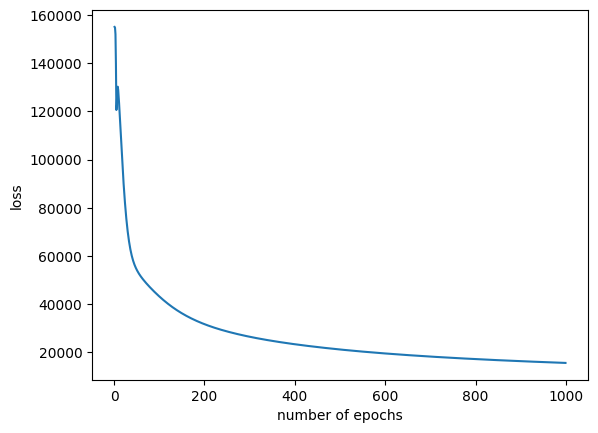

In [20]:
# Training
import math
import matplotlib.pyplot as plt

num_features=8000
y=[int(l == "positive") for l in sentiment_labels]
weights = np.random.rand(num_features)
bias=np.random.rand(1)
n_iters = 1000
lr=0.4
logistic_loss=[]
num_samples=len(y)
for i in range(n_iters):
  # Basically you are multiplying all the values of M_train with the weights
  # It would be similar to this: z= bias + (x[0]*weights[0] + x[1]*weights[1])
  # The values here would be 21928, 5000 and 5000, 1, leading to a matrix of 21928, 1
  z= M_train.dot(weights) + bias
  # print(z)
  # (1 / (1+np.exp(-z))) we use sigmoid because we only need to know whether it is positive or negative, two possible values
  q = (1 / (1+np.exp(-z)))
  # print(q)
  eps=0.00001
  loss = -sum((y*np.log2(q+eps)+(np.ones(len(y))-y)*np.log2(np.ones(len(y))-q+eps)))
  logistic_loss.append(loss)
  # We then make the prediction, if it is below a certain number, 0.5 it is negative and vice versa
  y_pred=[int(ql > 0.5) for ql in q]

  # For logistic regression one shot encoder= dw1 = np.dot(x[0],q-y)/num_samples
  # dw1 = np.do(x[0], q-y)/num_samples

  dw = (q-y).dot(M_train)/num_samples
  db = sum(q-y)/num_samples
  weights = weights - dw*lr
  bias = bias - db*lr

plt.plot(range(1,n_iters),logistic_loss[1:])
plt.xlabel("number of epochs")
plt.ylabel("loss")

In [18]:
z= M_test.dot(weights) + bias
q = (1 / (1+np.exp(-z)))
y_test_pred=[int(ql > 0.5) for ql in q]

In [19]:
y_test=[int(l == "positive") for l in sentiment_labels_test]
acc_test=[int(yp == y_test[s]) for s,yp in enumerate(y_test_pred)]
print(sum(acc_test)/len(acc_test))

0.8049247606019152
